In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
import os

In [2]:

from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import classification_report_imbalanced

In [3]:
#Read the CSV and Perform Basic Data Cleaning

#data is columns of csv
data = ['Loan_ID', 'Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

target = ['Loan_Status']

In [4]:
# Load the data
data_set=pd.read_csv('train.csv')

# Drop the null rows
df = data_set.dropna()

# convert Loan_ID to numerical
df['Loan_ID'] = data_set['Loan_ID'].str.replace('%','')

# Convert the target column values to Y and N based on their values
x = {'Current': 'N'}   
df = df.replace(x)

df.head()

<ipython-input-4-b68d9ba7af87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_ID'] = data_set['Loan_ID'].str.replace('%','')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
#Data before drop null rows
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df['Loan_ID']

1      LP001003
2      LP001005
3      LP001006
4      LP001008
5      LP001011
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 480, dtype: object

In [7]:
#Split the Data into Training and Testing
# Create our features
X = df.drop("Loan_Status", axis=1)
X = pd.get_dummies(X)

# Create our target
y = df["Loan_Status"]

In [8]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.002083,0.002083,0.002083,0.002083,0.002083,...,0.166667,0.177083,0.085417,0.797917,0.202083,0.862500,0.137500,0.289583,0.397917,0.312500
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.045644,0.045644,0.045644,0.045644,0.045644,...,0.373067,0.382137,0.279792,0.401973,0.401973,0.344734,0.344734,0.454042,0.489979,0.463996
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Check the balance of our target values
y.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=109)

In [11]:
# Step 1: Import the model you want to use
from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# Step 3: Train the model on the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [12]:
y_pred=clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[17, 18],
       [ 3, 82]], dtype=int64)

[Text(167.4, 181.2, 'X[4] <= 0.5\ngini = 0.431\nsamples = 360\nvalue = [113, 247]'),
 Text(83.7, 108.72, 'X[215] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [46, 4]'),
 Text(41.85, 36.23999999999998, 'gini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 48.0\ngini = 0.339\nsamples = 310\nvalue = [67, 243]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.333\nsamples = 308\nvalue = [65, 243]')]

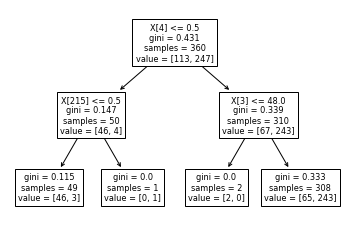

In [15]:
tree.plot_tree(clf)

In [16]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           N       0.85      0.49      0.62        35
           Y       0.82      0.96      0.89        85

    accuracy                           0.82       120
   macro avg       0.83      0.73      0.75       120
weighted avg       0.83      0.82      0.81       120



In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[17 18]
 [ 3 82]]
Classification Report:
              precision    recall  f1-score   support

           N       0.85      0.49      0.62        35
           Y       0.82      0.96      0.89        85

    accuracy                           0.82       120
   macro avg       0.83      0.73      0.75       120
weighted avg       0.83      0.82      0.81       120

Accuracy: 0.825


In [20]:
conda install -c anaconda python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


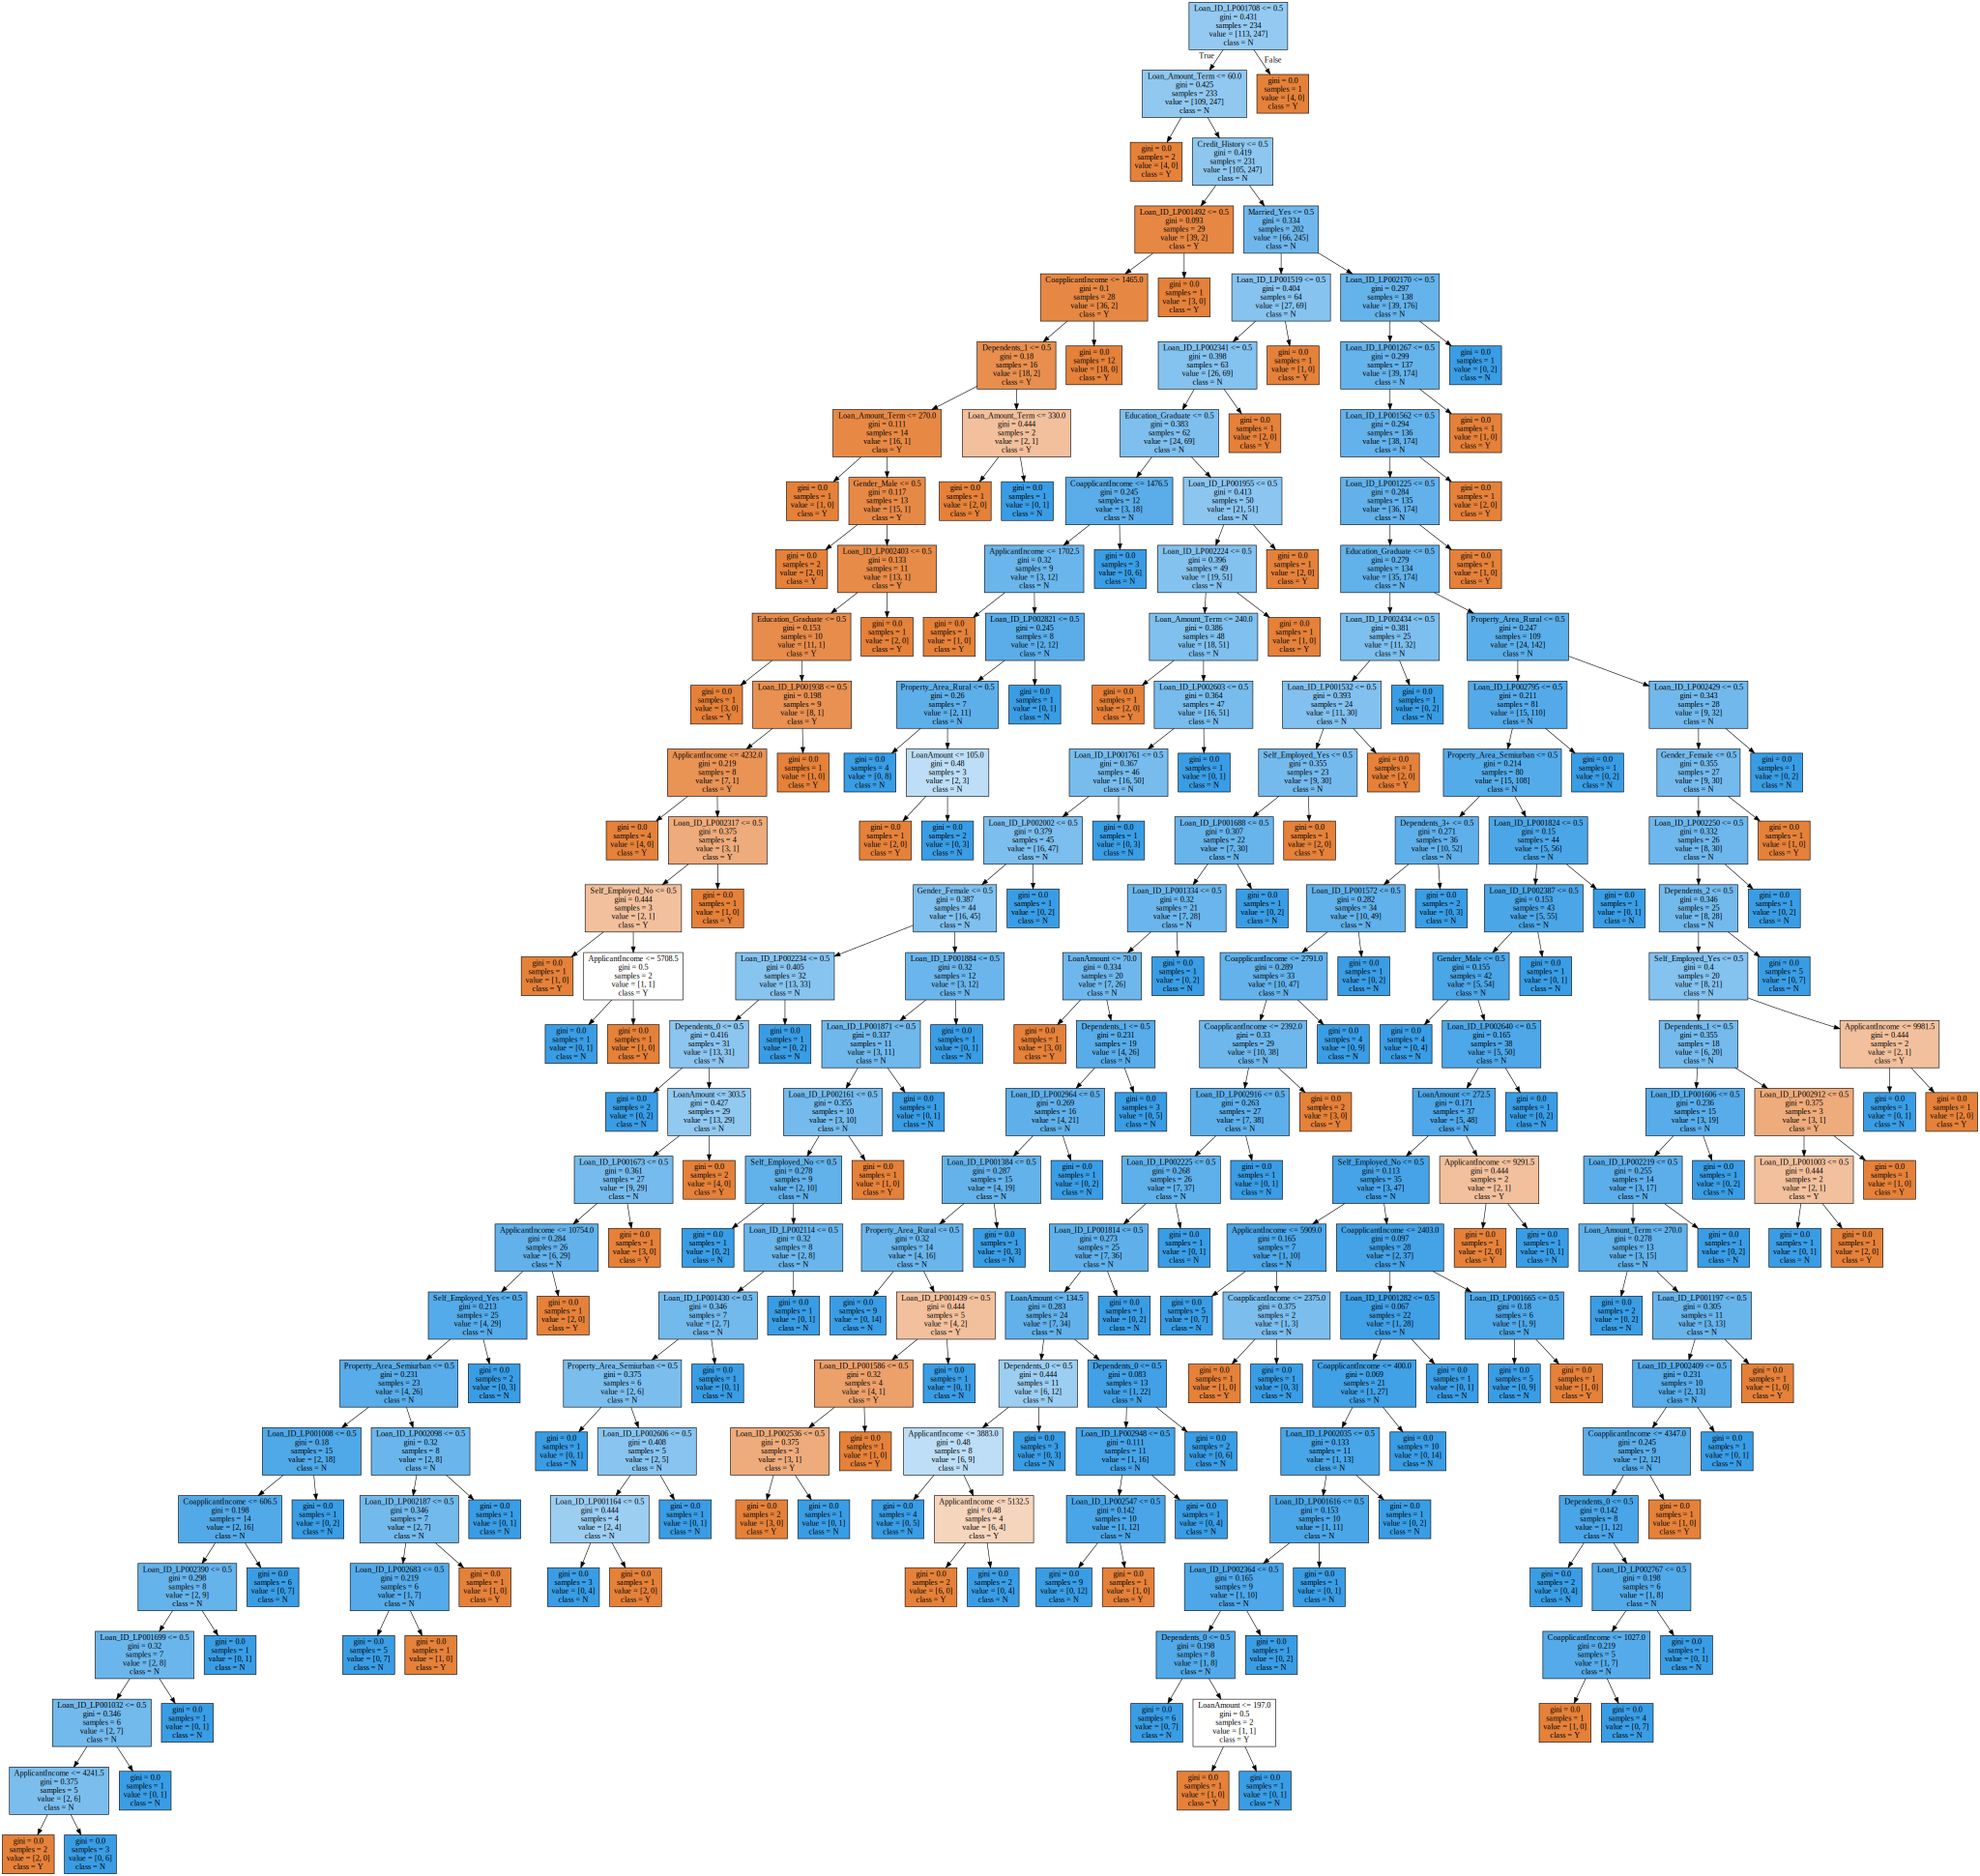

In [21]:
import graphviz

# DOT data
dot_data = tree.export_graphviz(classifier.estimators_[0], out_file=None, 
                                feature_names=X.columns, 
                                class_names=["Y","N"], 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

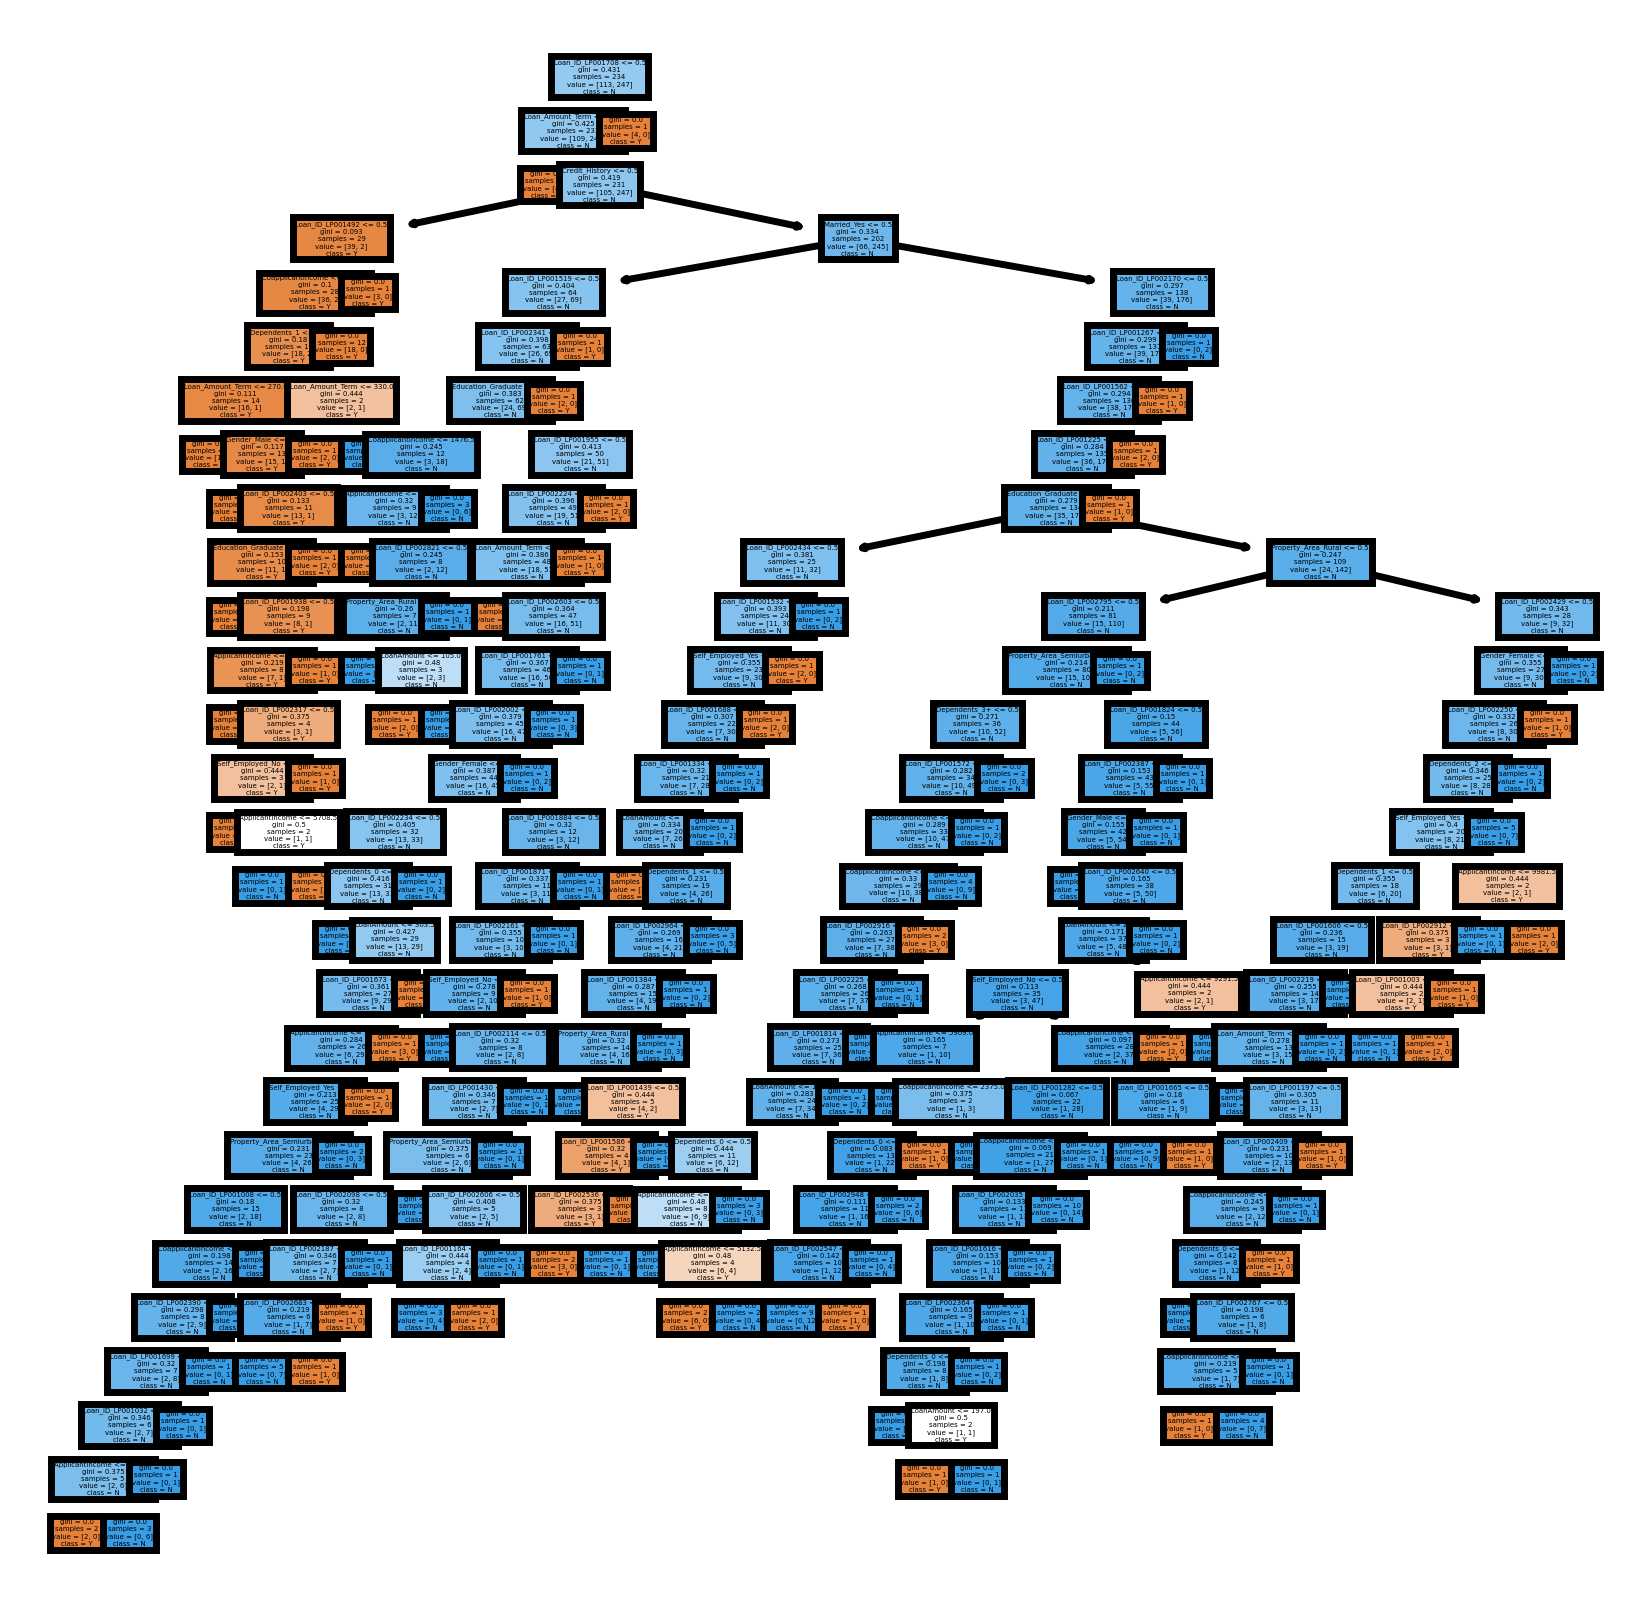

In [22]:
fn = X.columns
cn = ["Y","N"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
fig.savefig('rf_individualtree.png')